# STATA패널데이터 분석

< 패널 모형>
--

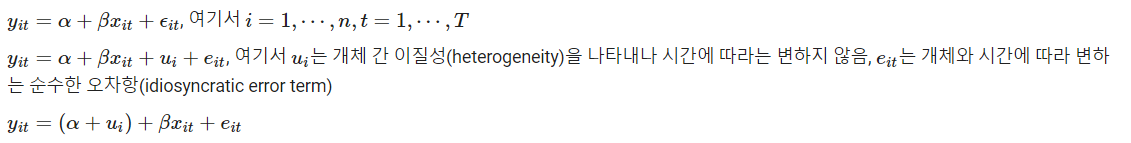

**1. 합동(Pooled) OLS**

$$ y_{it} = \alpha + \beta x_{it} + \epsilon_{it} $$
 - 패널을 무시하고 OLS 추정

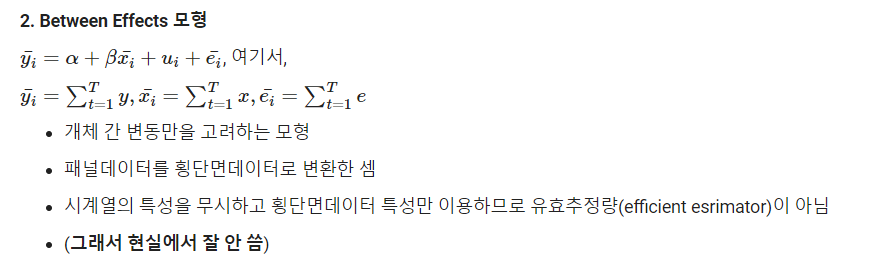

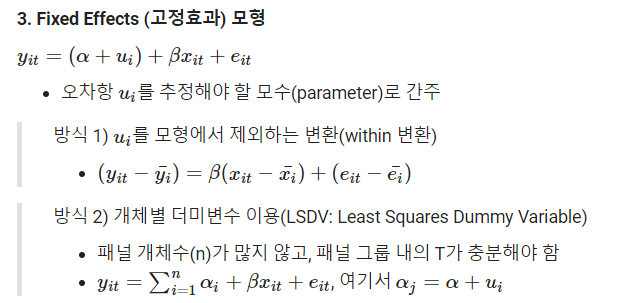

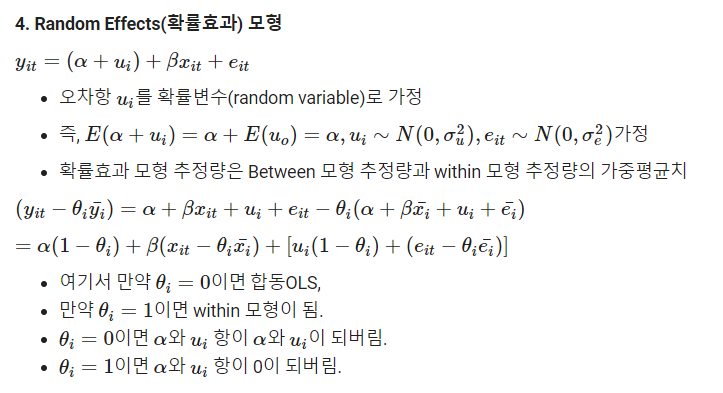

IN STATA(Between Effects 모형)
--

$ \bar{y_i} = \alpha + \beta \bar{x_i} + u_i + \bar{e_i}$

**데이터 미리보기**

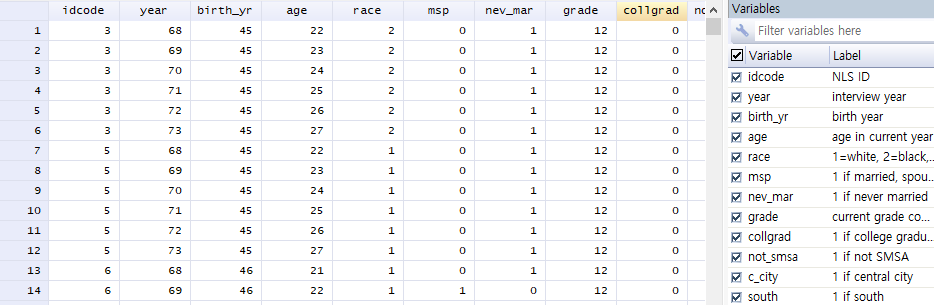

**데이터 설명 **

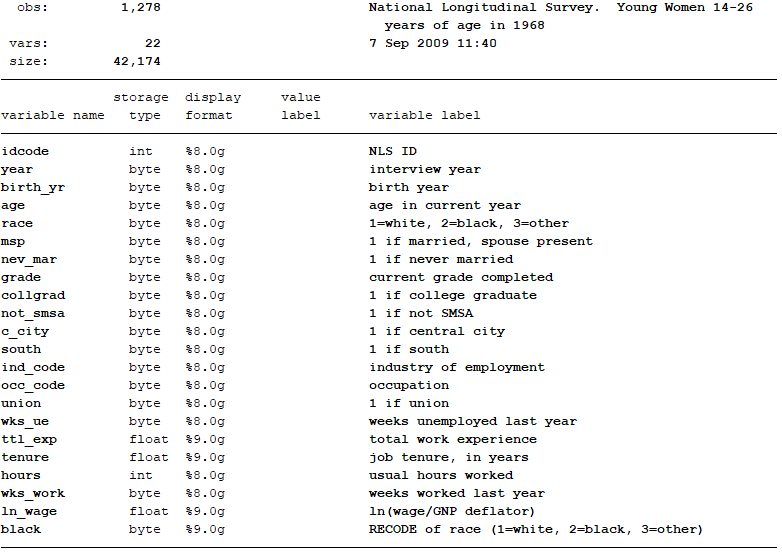

tsset id year: 패널 데이터의 개체(id)와 시간(year) 지정

reg ln_wage ttl_exp tenure black: 비교를 위해 합동 OLS 추정

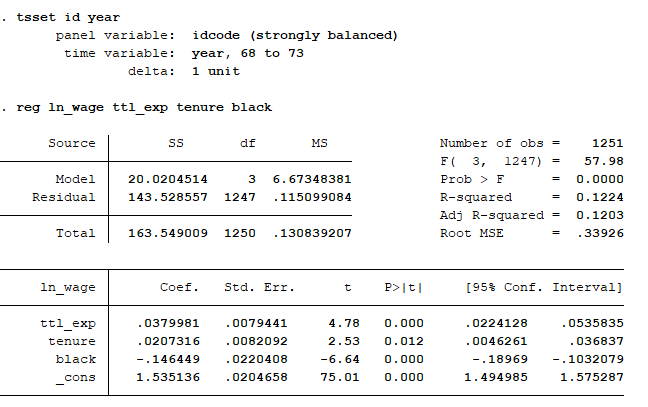

xtreg ln_wage ttl_exp tenure black, be

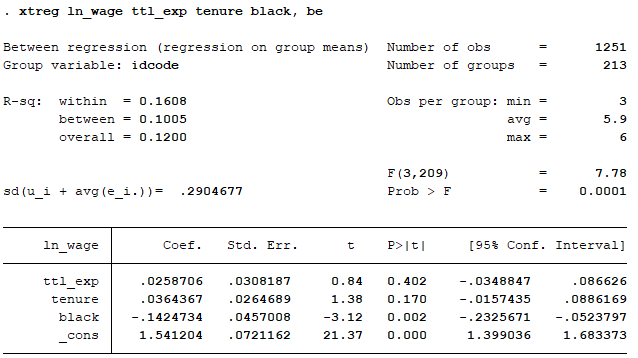

$overall R^2$ 직접 계산해보기

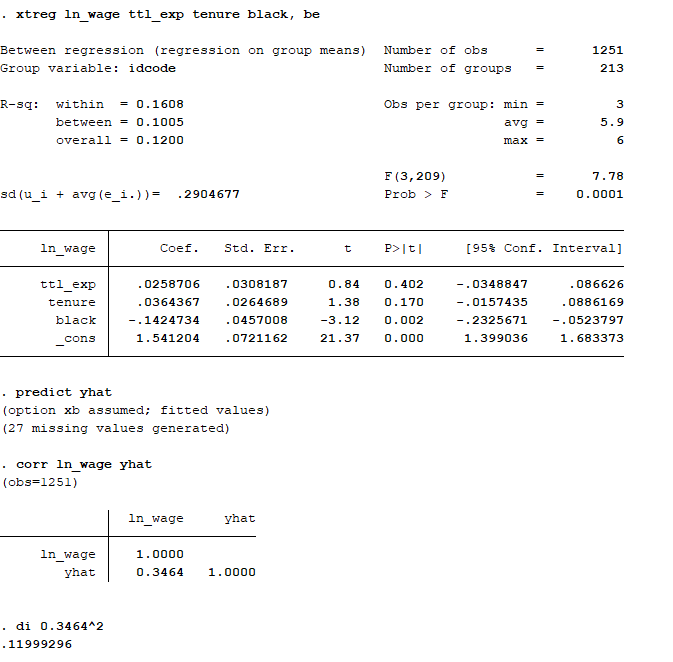

**Between Effects 모형 추정(직접 변수를 변환하여 OLS 추정)**

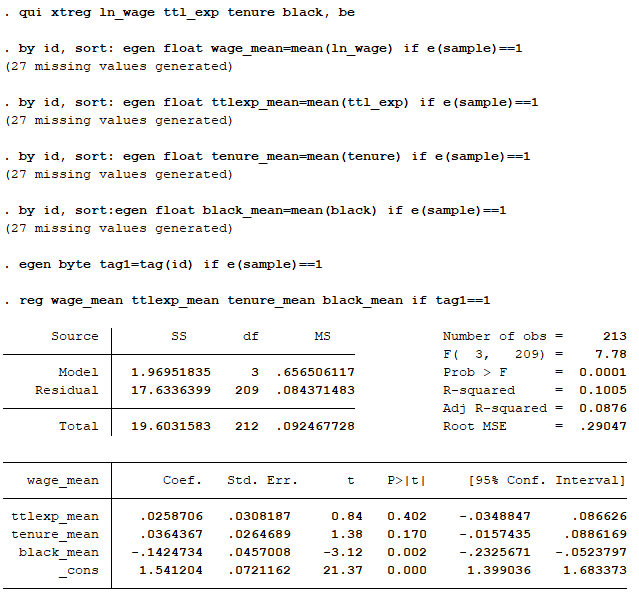

**코드 설명**
- qui xtreg ln_wage ttl_exp tenure black, be: 어떤 관측치들이 between 모형 추정에 사용되었는지 알기 위해 xtreg 명령어 실행

-  by id, sort: egen float wage_mean=mean(ln_wage) if e(sample)==1: 각 패널 그룹 별로 추정에 사용된 관측치만을 이용(if (e(sample)==1)하여 평균을 계산하여 새로운 변수 생성(egen)

- egen byte tag1=tag(id) if e(sample)==1: 각 패널 그룹에서 관측시점이 첫 번째이면 1, 그 외의 시점에는 0을 부여하는 새로운 변수 "tag1" 생성 

**사후 분석(모형 추정 후 적합값(fitted value)와 잔차(residuals) 계산하기)**

predict 잔차, 식

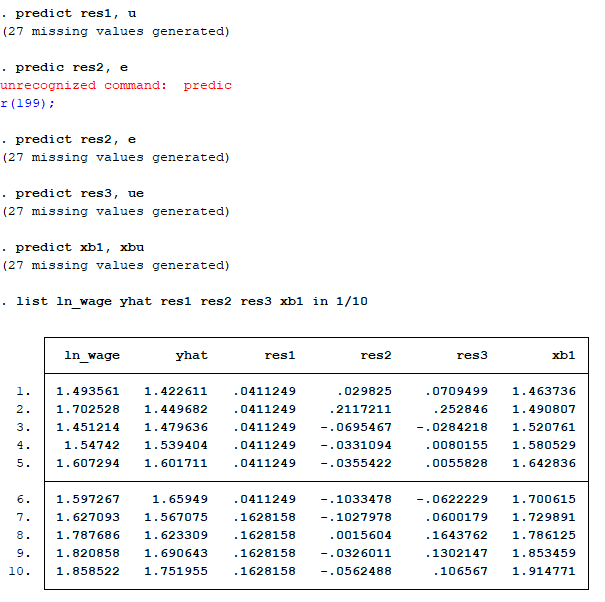

Fixed Effects (고정효과) 모형
--

**1. $u_i$를 모형에서 제외하는 변환(within 변환)**

$(y_{it} - \bar{y_i}) =\beta (x_{it} - \bar{x_i}) + (e_{it} - \bar{e_i})$

고정효과 모형의 추정계수는 각 회사의 시간에 따라 변하지 않는 이질성(heterogeneity)을 감안한 상태에서 추정한 한계효과(marginal effect)

- $H_0: u_i=0$에 대한 F검정 결과 귀무가설을 받아들인다면 **합동OLS 추정** 선택, 귀무가설이 기각되면 **고정효과 모형** 선택

$between R^2 \Rightarrow [corr(\bar{y_i}, \hat{\alpha}_{FE} + \hat{\beta}_{FE} \bar{x_i})]^2 $

$overall R^2 \Rightarrow [corr(y_{it}, \hat{\alpha}_{FE} + \hat{\beta}_{FE} x_{it} ) ]^2 $

**2. 개체별 더미변수 이용(LSDV: Least Squares Dummy Variable)**

$ y_{it}=\sum_{i=1}^n \alpha_i + \beta x_{it} + e_{it}  $, 여기서 $\alpha_i = \alpha + u_i$

**3. 패널모형에서 개체의 이질성과 시간의 이질성을 동시에 고려하는 모형(이원고정효과 모형: two-way fixed effects model)**

$ y_{it} = \alpha + \beta x+{it} + u_o + v_i + e_{it} $

IN STATA (Fixed Effects(고정 효과) 모형 실습)
-- 

**$H_0: u_i = 0$에 대한 F검정 결과 귀무가설이 기각되어 고정효과 모형 선택**

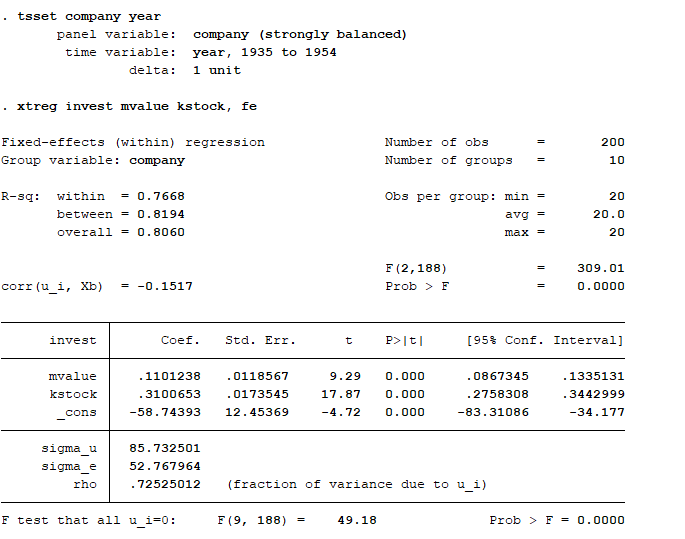

**개체별 더미변수 이용**

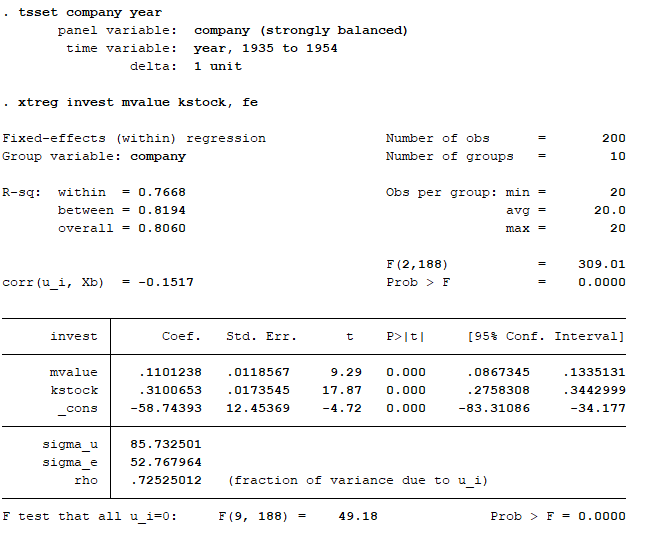

- xtreg invest mvalue kstock, fe: 비교를 위해 고정효과 모형 추정

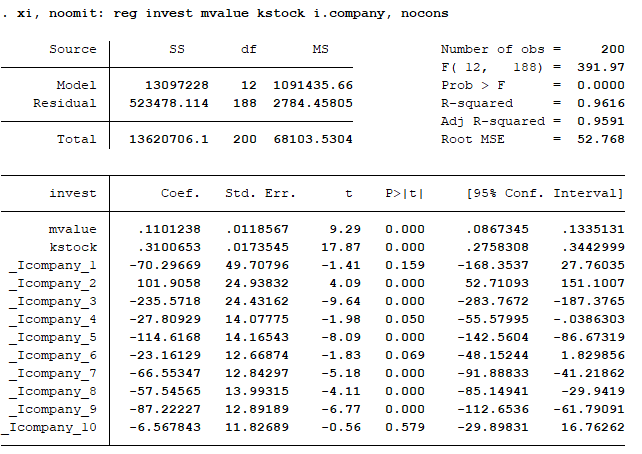

- xi, noomit: reg invest mvalue kstock i.company, nocons: 10개 패널 개체(회사)에 해당하는 더미변수(i.company)를 모두 생성시키면서, 상수항은 제외하고 OLS 추정

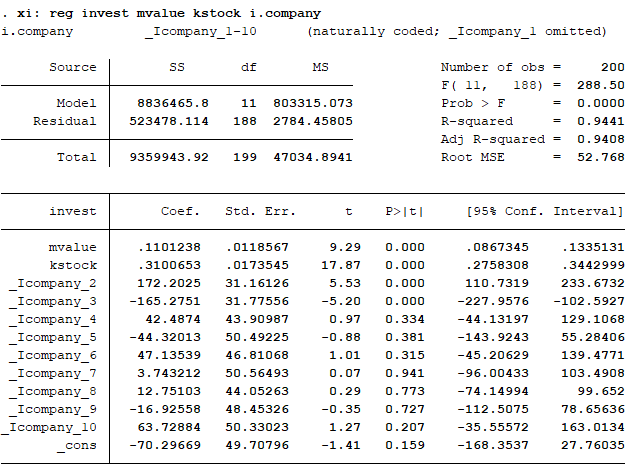

- xi: reg invest mvalue kstock i.company: 상수항과 9개 패널 개체(회사)에 해당하는 더미변수(i.company)를 생성하여 OLS 추정

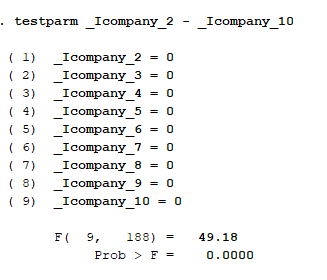

- testparm _Icompany_2 - _Icompany_10: 9개의 더미변수의 추정계수가 0인지 F 검정



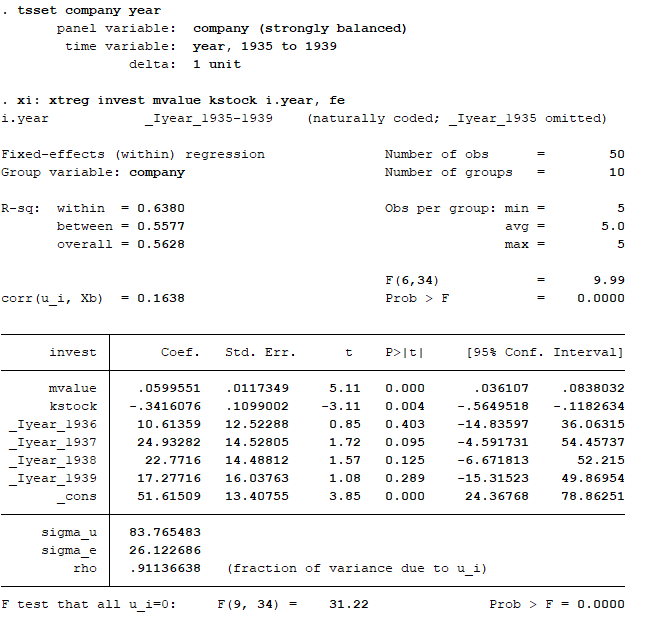

- 패널 그룹의 수가 많을 경우는 reg 명령문 대신 **areg명령어** 사용

Random Effects(확률효과) 모형
 --

**1. 확률효과 모형 추정**

$(y_{it} - \theta_i \bar{y_i}) = \alpha(1-\theta_i) + \beta(x_{it} - \theta_i \bar{x_i}) + [u_i(1-\theta_i) + (e_{it} - \theta_i \bar{e_i})] $

- 확률효과 모형 추정($\theta_i 추정 포함) 후 $\tehta_i$값이 1에 가까우면 추정계수가 고정효과 모형의 결과와 유사할 것으로 예상한다.

- rho($\hat{\rho}$) 값은 전체 오차항의 분산에서 패널 그룹 오차항인 $u_i$의 분산이 차지하는 비중이며, $\hat{\rho}$이 1에 가까울수록 개체특성 오차항의 분산이 큰 비중을 차지한다는 의미이므로 개체특성을 고려한 선형회귀분석의 필요성 암시

- $\hat{\rho} = \frac{\hat{\sigma_u}^2}{\hat{\sigma_u}^2+\hat{\sigma_e}^2}$

> **IN STATA**

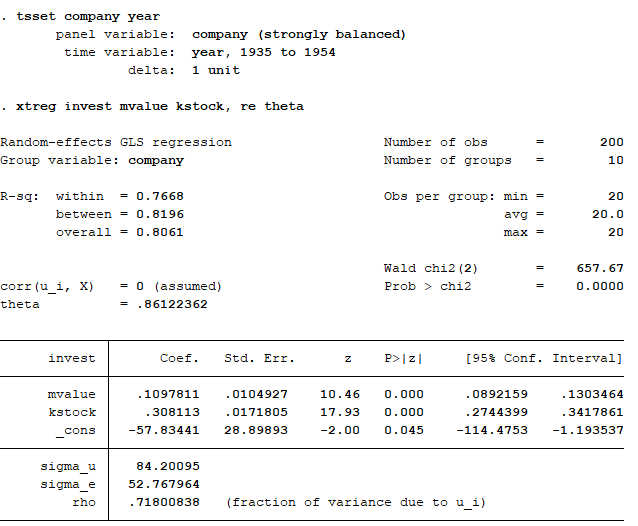

**2. 3가지 모형에 대한 비교와 해석**

> **IN STATA**

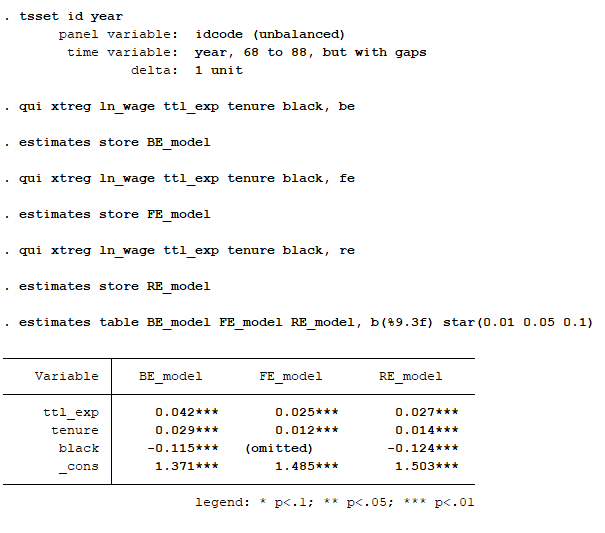

- qui xtreg ln_wage ttl_exp tenure black, be: Between 모형 추정

- estimates store BE_model: 추정결과를 BE_model 이름으로 저장

- qui xtreg ln_wage ttl_exp tenure black, fe: 고정효과(within) 모형 추정

- estimates store FE_model: 추정결과를 FE_model 이름으로 저장

- qui xtreg ln_wage ttl_exp tenure black, re: 확률효과 모형 추정

- estimates store RE_model: 추정결과를 RE_model 이름으로 저장

- estimates table BE_model FE_model RE_model, b(%9.3f) star(0.01 0.05 0.1) : 표를 작성하라.

- **참고: qui: 결과를 보여주지 말라는 명령어**

가설검정
--

**오차항($u_i$)에 대한 가설검정**

**고정효과 모형에서 $u_i$가 유의한지 (H0: $u_i = 0$) 검정**

**귀무가설을 기각하면 고정효과 모형 채택, 기각할 수 없으면 합동 OLS 채택**

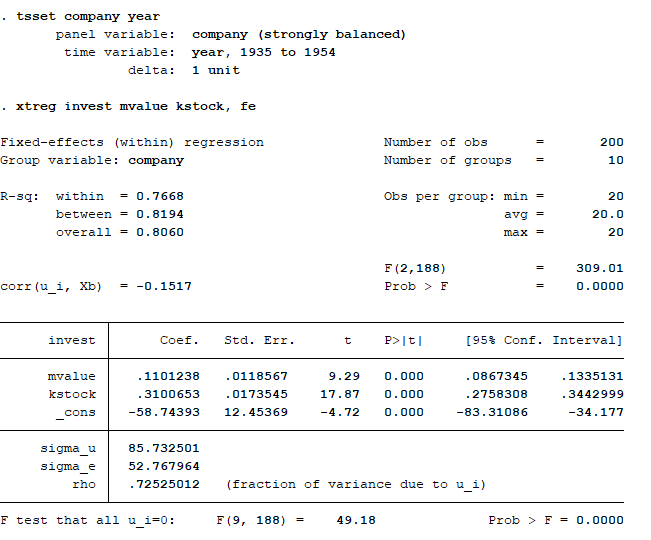

**확률효과 모형에서 $u_i$ (확률변수)가 유의한지 ($H0: var(u_i) = \sigma_u^2 =0$) 검정**

**귀무가설을 기각하면 확률효과 모형 채택, 기각할 수 없으면 합동OLS 채택**



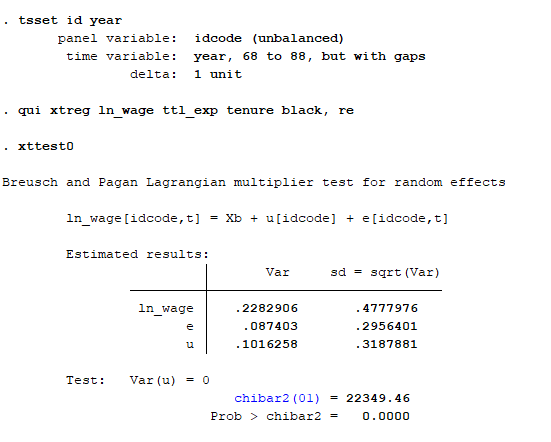

- xttest0: Breusch-Pagan 검정하라.

- 귀무가설을 기각하면 확률효과 모형 채택, 기각할 수 없으면 합동OLS 채택

**2. 하우스만 검정: $u_i$를 고정효과로 볼 것이냐, 확률효과로 볼 것이냐 검정**


일차적 기준: $u_i$에 대한 추론(inference)

- 패널개체들이 모집단에서 무작위 추출(예) 한국노동패널데이터) $\rightarrow$ 확률효과

- 패널개체들이 특정 모집단 자체(예) OECD 국가패널, 미국 50개주) $\rightarrow$ 고정효과

계량경제학 측면

- $H0: cov(x_{it}, u_i) =0 $ $\rightarrow$ 확률효과 모형 이용 (확률효과 모형과 고정효과 모형이 모두 일치추정량이지만 확률효과 모형이 더 효율적)

- $H0: cov(x_{it}, u_i) \neq 0$ $\rightarrow$ 고정효과 모형 이용(확률효과 모형은 일치추정량이 아니므로)

> **IN STATA**

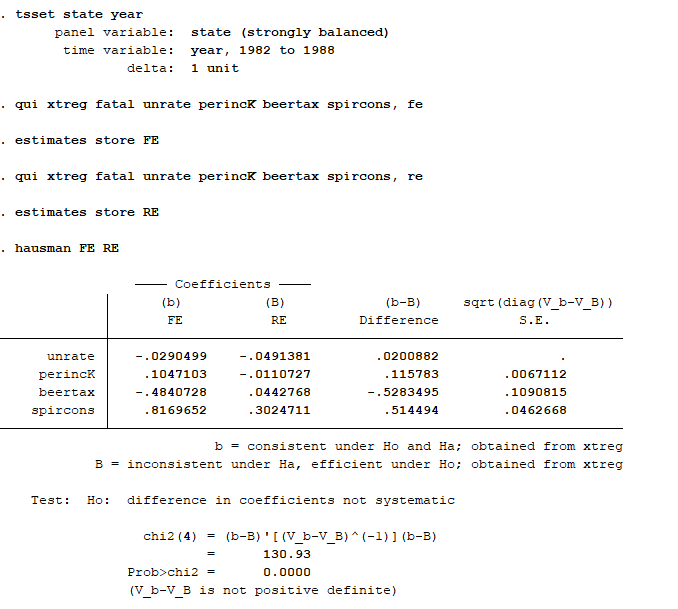

**주의: 반드시 고정효과(FE)를 먼저 적고, 그 다음에 확률효과(RE)를 적어라!!**